In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head


<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [3]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()     
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier
base_model=DecisionTreeClassifier(max_depth=1)


In [18]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [19]:
y_pred=classifier.predict(x_test)


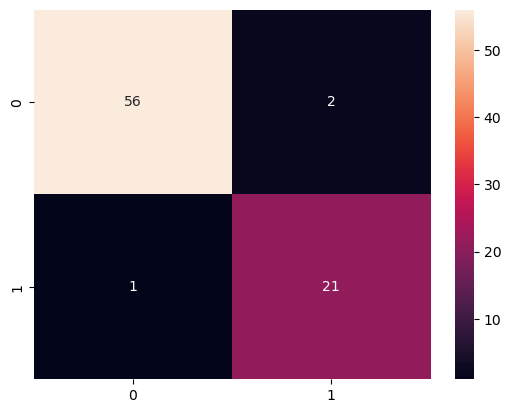

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)  
sns.heatmap(cm, annot=True)
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)  
print(cm)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:", acc)

[[56  2]
 [ 1 21]]
Accuracy: 0.9625
